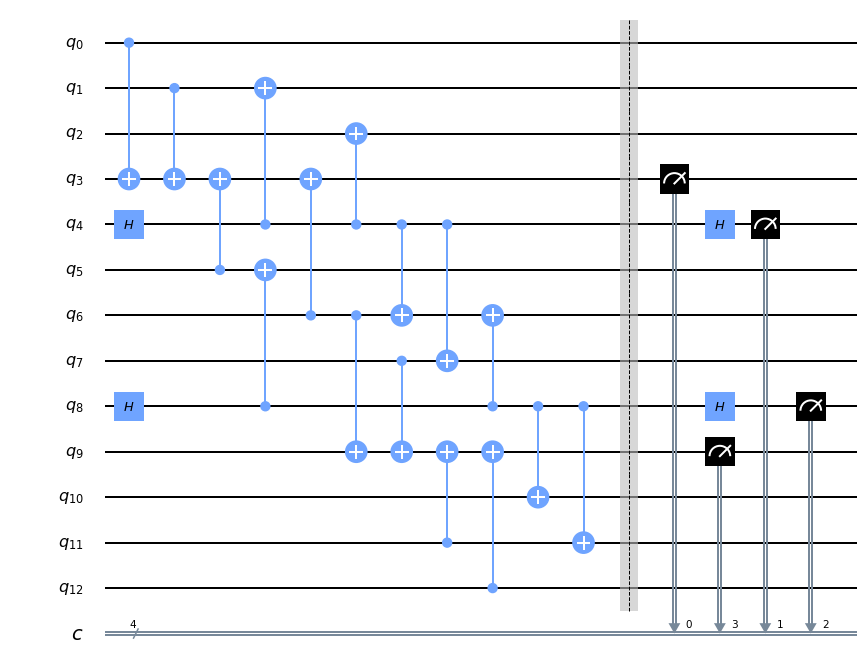

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
circ = QuantumCircuit(13)
circ.h(4)
circ.h(8)
circ.cx(0,3)
circ.cx(1,3)
circ.cx(5,3)
circ.cx(6,3)
circ.cx(6,9)
circ.cx(7,9)
circ.cx(11,9)
circ.cx(12,9)
circ.cx(4,1)
circ.cx(4,2)
circ.cx(4,6)
circ.cx(4,7)
circ.cx(8,5)
circ.cx(8,6)
circ.cx(8,10)
circ.cx(8,11)
meas = QuantumCircuit(13,4)
meas.barrier(range(13))
meas.measure(3,0)
meas.h(4)
meas.measure(4,1)
meas.h(8)
meas.measure(8,2)
meas.measure(9,3)
qc=circ+meas
qc.draw()

In [2]:
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info.operators import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

In [33]:
noise_model = NoiseModel()
error = depolarizing_error(0.05, 1)
noise_model.add_all_qubit_quantum_error(error, ['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10','u11','u12','u13'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['u10', 'u12', 'u1', 'u5', 'u9', 'u13', 'u2', 'u4', 'u7', 'u6', 'u3', 'u8', 'u11']
  All-qubits errors: ['u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13']


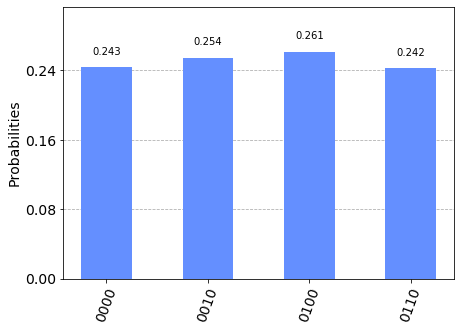

In [3]:
simulator = QasmSimulator()
job = execute(qc, simulator)
result_ideal = job.result()
plot_histogram(result_ideal.get_counts(0))

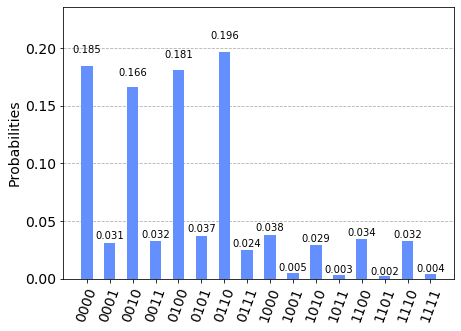

In [4]:
p_reset = 0.03
p_meas = 0.03
p_gate1 = 0.03

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

job = execute(qc, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_noise = job.result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise)